## 統一企業 (1216.TW) 股價資料分析

本筆記示範如何收集台股 1216.TW 的歷史股價並繪製基本趨勢圖和移動平均線。 若無法使用 yfinance 從網路取得資料，程式將自動改用內建的近期股價資料示範。

In [1]:
# 在需要時安裝 yfinance 與 mplfinance
# !pip install yfinance mplfinance --quiet

In [2]:

import pandas as pd
import matplotlib.pyplot as plt

# 嘗試透過 yfinance 下載資料；若失敗則使用內建的近期股價資料
try:
    import yfinance as yf
    ticker = '1216.TW'
    stock_data = yf.download(ticker, start='2025-07-31', end='2025-09-15', progress=False)
    if stock_data.empty:
        raise ValueError("No data downloaded")
except Exception as e:
    # fallback: recent stock prices (manually collected)
    data = {
        'Date': [
            '2025-09-12','2025-09-11','2025-09-10','2025-09-09','2025-09-08','2025-09-05','2025-09-04',
            '2025-09-03','2025-09-02','2025-09-01','2025-08-29','2025-08-28','2025-08-27','2025-08-26',
            '2025-08-25','2025-08-22','2025-08-21','2025-08-20','2025-08-19','2025-08-18','2025-08-15',
            '2025-08-14','2025-08-13','2025-08-12','2025-08-11','2025-08-08','2025-08-07','2025-08-06',
            '2025-08-05','2025-08-04','2025-08-01','2025-07-31'
        ],
        'Open': [79.00,79.30,79.40,78.90,78.10,78.20,78.00,78.10,77.30,77.40,77.90,76.50,76.40,77.50,
                 77.80,78.20,77.70,77.20,77.60,78.50,78.60,77.90,78.40,78.00,78.20,78.80,79.30,79.80,
                 79.80,79.20,78.90,79.70],
        'High': [79.50,79.70,79.90,79.80,79.10,78.50,78.30,78.30,78.20,77.90,78.10,77.90,77.20,77.50,
                 78.10,78.40,78.30,77.40,77.60,78.60,78.80,78.40,78.40,78.20,78.20,79.10,79.80,79.80,
                 80.40,80.00,80.10,79.70],
        'Low':  [78.80,78.70,79.10,78.70,78.10,78.10,77.70,77.70,77.30,77.10,77.20,76.40,76.20,76.30,
                 77.30,77.30,77.30,76.80,77.00,77.50,77.70,77.60,77.20,77.60,77.30,77.80,78.90,79.00,
                 79.40,79.20,78.90,78.60],
        'Close':[79.30,78.90,79.50,79.40,78.90,78.10,78.10,77.90,78.20,77.40,77.40,77.70,76.70,76.30,
                 77.80,77.50,77.80,77.10,77.30,77.80,78.80,78.20,77.60,77.80,77.80,78.20,79.10,79.10,
                 79.80,80.00,79.40,79.20],
        'Volume':[5601412,7989354,9585758,11414751,6876658,4947791,5442607,4423185,5378072,3943425,
                 11740973,11198572,6910942,18616972,8328914,8816575,9005381,7786251,7568390,8218872,
                 8067858,7386892,13214520,10895627,11037355,12775057,10111835,7487658,8136708,6118058,
                 7677704,16549302]
    }
    stock_data = pd.DataFrame(data)
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    stock_data.set_index('Date', inplace=True)

# 計算移動平均線
stock_data['MA20'] = stock_data['Close'].rolling(20).mean()
stock_data['MA60'] = stock_data['Close'].rolling(60).mean()
stock_data


,Open,High,Low,Close,Volume,MA20,MA60
Date,,,,,,,
2025-09-12,79.0,79.5,78.8,79.3,5601412,NaN,NaN
2025-09-11,79.3,79.7,78.7,78.9,7989354,NaN,NaN
2025-09-10,79.4,79.9,79.1,79.5,9585758,NaN,NaN
2025-09-09,78.9,79.8,78.7,79.4,11414751,NaN,NaN
2025-09-08,78.1,79.1,78.1,78.9,6876658,NaN,NaN
2025-09-05,78.2,78.5,78.1,78.1,4947791,NaN,NaN
2025-09-04,78.0,78.3,77.7,78.1,5442607,NaN,NaN
2025-09-03,78.1,78.3,77.7,77.9,4423185,NaN,NaN
2025-09-02,77.3,78.2,77.3,78.2,5378072,NaN,NaN


/opt/pyvenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/pyvenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/pyvenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32113 (\N{CJK UNIFIED IDEOGRAPH-7D71}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/pyvenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/pyvenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20225 (\N{CJK UNIFIED IDEOGRAPH-4F01}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


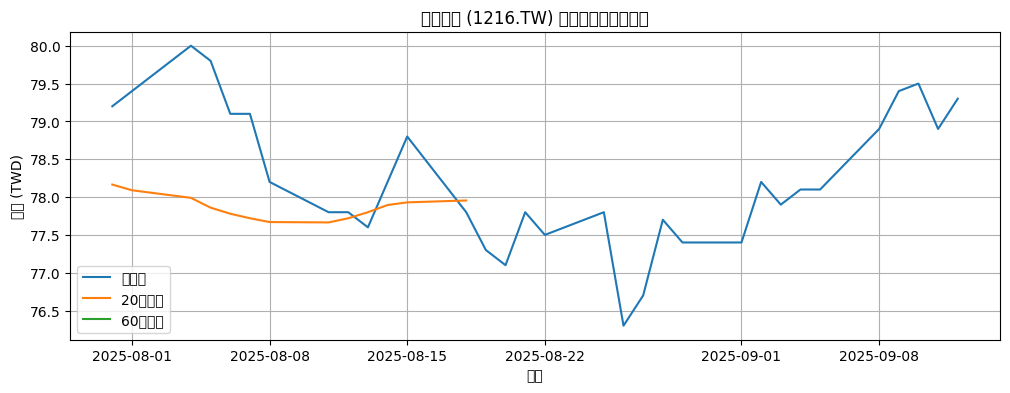

In [3]:

# 繪製收盤價與移動平均線
plt.figure(figsize=(12,4))
plt.plot(stock_data.index, stock_data['Close'], label='收盤價')
if 'MA20' in stock_data.columns:
    plt.plot(stock_data.index, stock_data['MA20'], label='20日均線')
if 'MA60' in stock_data.columns:
    plt.plot(stock_data.index, stock_data['MA60'], label='60日均線')
plt.title('統一企業 (1216.TW) 收盤價及移動平均線')
plt.xlabel('日期')
plt.ylabel('價格 (TWD)')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_266/4096465084.py:12: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  fig.tight_layout()
/tmp/ipykernel_266/4096465084.py:12: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from current font.
  fig.tight_layout()
/tmp/ipykernel_266/4096465084.py:12: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.tight_layout()
/tmp/ipykernel_266/4096465084.py:12: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.tight_layout()
/tmp/ipykernel_266/4096465084.py:12: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from current font.
  fig.tight_layout()
/tmp/ipykernel_266/4096465084.py:12: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.tight_layout()
/tmp/ipykernel_266/4096465084.py:12: UserWarning: Glyph 32113 (\N{CJK UNIFIED IDEOGRAPH-7D71}) missing from current font.
  fig.tight_layout()

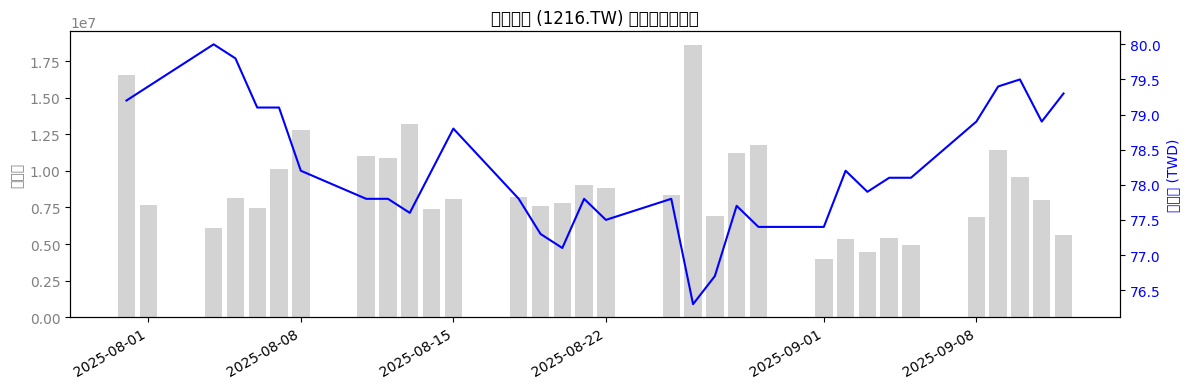

In [4]:

# 繪製成交量與收盤價雙軸圖
fig, ax1 = plt.subplots(figsize=(12,4))
ax1.bar(stock_data.index, stock_data['Volume'], color='lightgray', label='成交量')
ax1.set_ylabel('成交量', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')
ax2 = ax1.twinx()
ax2.plot(stock_data.index, stock_data['Close'], color='blue', label='收盤價')
ax2.set_ylabel('收盤價 (TWD)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
fig.autofmt_xdate()
plt.title('統一企業 (1216.TW) 成交量與收盤價')
fig.tight_layout()
plt.show()


透過上述程式，我們載入了統一企業在近期時間區段的歷史股價，計算了 20/60 日移動平均線，並繪製了收盤價趨勢圖與成交量。您可以調整日期區間、加入更多技術指標或比較其他股票，進一步分析股票走勢。